In [87]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# importar archivos csv
crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)
crossBattlelog.info()

C:\Users\alniquia\AppData\Local\Temp\ipykernel_17824\3354061991.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50915 entries, 0 to 50914
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   battleTime                             50915 non-null  object 
 1   playertag                              50915 non-null  object 
 2   event.id                               50915 non-null  int64  
 3   event.mode                             50915 non-null  object 
 4   event.map                              50915 non-null  object 
 5   battle.mode                            50915 non-null  object 
 6   battle.type                            50915 non-null  object 
 7   battle.result                          50915 non-null  object 
 8   battle.duration                        50915 non-null  float64
 9   battle.trophyChange                    36908 non-null  float64
 10  battle.starPlayer.tag                  42673 non-null  object 
 11  ba

In [89]:
# importar archivos csv
players = pd.read_csv('datasets/players/players.csv', index_col=0)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84099 entries, 0 to 84098
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tag                                   84099 non-null  object 
 1   name                                  84098 non-null  object 
 2   nameColor                             81658 non-null  object 
 3   trophies                              84099 non-null  int64  
 4   highestTrophies                       84099 non-null  int64  
 5   expLevel                              84099 non-null  int64  
 6   expPoints                             84099 non-null  int64  
 7   isQualifiedFromChampionshipChallenge  84099 non-null  bool   
 8   3vs3Victories                         84099 non-null  int64  
 9   soloVictories                         84099 non-null  int64  
 10  duoVictories                          84099 non-null  int64  
 11  bestRoboRumbleT

In [90]:
# importar archivos csv
brawlers = pd.read_csv('datasets/brawlers/brawlers_stats.csv', index_col=0)
brawlers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      64 non-null     int64 
 1   name    64 non-null     object
 2   role    64 non-null     object
 3   range   64 non-null     object
 4   speed   64 non-null     object
 5   health  64 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.5+ KB


In [91]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team1    25502
team2    25413
Name: player_team, dtype: int64

In [92]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    25563
team2    25109
draw       243
Name: winner_team, dtype: int64

In [93]:
# agregar columna identificando batallas levelup y definir subset
for i in range(len(crossBattlelog)):

	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

	if  (t1p1 <= 500 or t1p2 <= 500 or t1p3 <= 500 or t2p1 <= 500 or t2p2 <= 500 or t2p3 <= 500):
		crossBattlelog.loc[i, 'low_trophy'] = 'y'
	else:
		crossBattlelog.loc[i, 'low_trophy'] = 'n'

crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n'].reset_index(drop=True)

crossBattlelog.shape

(31808, 66)

In [94]:
# format date
for i, battleTime in enumerate(crossBattlelog['battleTime']):	
	crossBattlelog.loc[i, 'battleTime'] = pd.to_datetime(crossBattlelog.loc[i, 'battleTime'])
crossBattlelog['battleTime']

0        2023-01-16 16:43:11+00:00
1        2023-01-16 16:39:40+00:00
2        2023-01-16 16:36:35+00:00
3        2023-01-16 16:31:46+00:00
4        2023-01-16 16:25:57+00:00
                   ...            
31803    2022-12-31 15:14:10+00:00
31804    2023-01-02 04:18:29+00:00
31805    2023-01-02 04:05:44+00:00
31806    2023-01-01 16:35:13+00:00
31807    2023-01-02 02:19:30+00:00
Name: battleTime, Length: 31808, dtype: object

In [95]:
# agregar players
battlelogSet = crossBattlelog

def add_players(df, prefix):
	df = pd.merge(left=df, right=players.add_prefix(prefix), on=prefix + 'tag', how='left', suffixes=('','_p'))
	return df

battlelogSet = add_players(battlelogSet, 'battle.team1.player1.')
battlelogSet = add_players(battlelogSet, 'battle.team1.player2.')
battlelogSet = add_players(battlelogSet, 'battle.team1.player3.')
battlelogSet = add_players(battlelogSet, 'battle.team2.player1.')
battlelogSet = add_players(battlelogSet, 'battle.team2.player2.')
battlelogSet = add_players(battlelogSet, 'battle.team2.player3.')

battlelogSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31808 entries, 0 to 31807
Columns: 168 entries, battleTime to battle.team2.player3.highestPowerPlayPoints
dtypes: float64(105), int64(1), object(62)
memory usage: 41.0+ MB


In [96]:
# agregar brawler stats
def add_brawlers(df, prefix):
	df = pd.merge(left=df, right=brawlers.add_prefix(prefix), on=prefix + 'id', how='left', suffixes=('','_b'))
	return df

battlelogSet = add_brawlers(battlelogSet, 'battle.team1.player1.brawler.')
battlelogSet = add_brawlers(battlelogSet, 'battle.team1.player2.brawler.')
battlelogSet = add_brawlers(battlelogSet, 'battle.team1.player3.brawler.')
battlelogSet = add_brawlers(battlelogSet, 'battle.team2.player1.brawler.')
battlelogSet = add_brawlers(battlelogSet, 'battle.team2.player2.brawler.')
battlelogSet = add_brawlers(battlelogSet, 'battle.team2.player3.brawler.')

battlelogSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31808 entries, 0 to 31807
Columns: 198 entries, battleTime to battle.team2.player3.brawler.health
dtypes: float64(105), int64(7), object(86)
memory usage: 48.3+ MB


In [97]:
# crear columna winner
def clean_winner(team):

	df = battlelogSet[battlelogSet['player_team'] == team].reset_index(drop = True)

	for i, winner_team in enumerate(df['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == team:
			winner = 'y'
		else:
			winner = 'n'
		
		df.loc[i, 'winner'] = winner

	df = df.drop('winner_team', axis=1)

	df = df.rename(columns={
		'battle.' + team + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + team + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + team + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + team + '.player1.trophies': 'battle.player1.trophies'
		,'battle.' + team + '.player1.highestTrophies': 'battle.player1.highestTrophies'
		,'battle.' + team + '.player1.highestPowerPlayPoints': 'battle.player1.highestPowerPlayPoints'
		,'battle.' + team + '.player1.expLevel': 'battle.player1.expLevel'
		,'battle.' + team + '.player1.expPoints': 'battle.player1.expPoints'
		,'battle.' + team + '.player1.3vs3Victories': 'battle.player1.3vs3Victories'
		,'battle.' + team + '.player1.soloVictories': 'battle.player1.soloVictories'
		,'battle.' + team + '.player1.duoVictories': 'battle.player1.duoVictories'
		,'battle.' + team + '.player1.brawler.role': 'battle.player1.brawler.role'
		,'battle.' + team + '.player1.brawler.range': 'battle.player1.brawler.range'
		,'battle.' + team + '.player1.brawler.speed': 'battle.player1.brawler.speed'
		,'battle.' + team + '.player1.brawler.health': 'battle.player1.brawler.health'
		,'battle.' + team + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + team + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + team + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + team + '.player2.trophies': 'battle.player2.trophies'
		,'battle.' + team + '.player2.highestTrophies': 'battle.player2.highestTrophies'
		,'battle.' + team + '.player2.highestPowerPlayPoints': 'battle.player2.highestPowerPlayPoints'
		,'battle.' + team + '.player2.expLevel': 'battle.player2.expLevel'
		,'battle.' + team + '.player2.expPoints': 'battle.player2.expPoints'
		,'battle.' + team + '.player2.3vs3Victories': 'battle.player2.3vs3Victories'
		,'battle.' + team + '.player2.soloVictories': 'battle.player2.soloVictories'
		,'battle.' + team + '.player2.duoVictories': 'battle.player2.duoVictories'
		,'battle.' + team + '.player2.brawler.role': 'battle.player2.brawler.role'
		,'battle.' + team + '.player2.brawler.range': 'battle.player2.brawler.range'
		,'battle.' + team + '.player2.brawler.speed': 'battle.player2.brawler.speed'
		,'battle.' + team + '.player2.brawler.health': 'battle.player2.brawler.health'
		,'battle.' + team + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + team + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + team + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
		,'battle.' + team + '.player3.trophies': 'battle.player3.trophies'
		,'battle.' + team + '.player3.highestTrophies': 'battle.player3.highestTrophies'
		,'battle.' + team + '.player3.highestPowerPlayPoints': 'battle.player3.highestPowerPlayPoints'
		,'battle.' + team + '.player3.expLevel': 'battle.player3.expLevel'
		,'battle.' + team + '.player3.expPoints': 'battle.player3.expPoints'
		,'battle.' + team + '.player3.3vs3Victories': 'battle.player3.3vs3Victories'
		,'battle.' + team + '.player3.soloVictories': 'battle.player3.soloVictories'
		,'battle.' + team + '.player3.duoVictories': 'battle.player3.duoVictories'
		,'battle.' + team + '.player3.brawler.role': 'battle.player3.brawler.role'
		,'battle.' + team + '.player3.brawler.range': 'battle.player3.brawler.range'
		,'battle.' + team + '.player3.brawler.speed': 'battle.player3.brawler.speed'
		,'battle.' + team + '.player3.brawler.health': 'battle.player3.brawler.health'
	})

	df = df[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.name'
 		,'battle.starPlayer.brawler.id'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player1.trophies'
		,'battle.player1.highestTrophies'
		,'battle.player1.highestPowerPlayPoints'
		,'battle.player1.expLevel'
		,'battle.player1.expPoints'
		,'battle.player1.3vs3Victories'
		,'battle.player1.soloVictories'
		,'battle.player1.duoVictories'
		,'battle.player1.brawler.role'
		,'battle.player1.brawler.range'
		,'battle.player1.brawler.speed'
		,'battle.player1.brawler.health'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player2.trophies'
		,'battle.player2.highestTrophies'
		,'battle.player2.highestPowerPlayPoints'
		,'battle.player2.expLevel'
		,'battle.player2.expPoints'
		,'battle.player2.3vs3Victories'
		,'battle.player2.soloVictories'
		,'battle.player2.duoVictories'
		,'battle.player2.brawler.role'
		,'battle.player2.brawler.range'
		,'battle.player2.brawler.speed'
		,'battle.player2.brawler.health'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'battle.player3.trophies'
		,'battle.player3.highestTrophies'
		,'battle.player3.highestPowerPlayPoints'
		,'battle.player3.expLevel'
		,'battle.player3.expPoints'
		,'battle.player3.3vs3Victories'
		,'battle.player3.soloVictories'
		,'battle.player3.duoVictories'
		,'battle.player3.brawler.role'
		,'battle.player3.brawler.range'
		,'battle.player3.brawler.speed'
		,'battle.player3.brawler.health'
		,'winner'
	]]

	return df

def clean_loser(team):

	df = battlelogSet[battlelogSet['player_team'] == team].reset_index(drop = True)

	if team == 'team1':
		oteam = 'team2'
	else:
		oteam = 'team1'

	for i, winner_team in enumerate(df['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == team:
			winner = 'n'
		else:
			winner = 'y'
		
		df.loc[i, 'winner'] = winner

	df = df.drop('winner_team', axis=1)

	df = df.rename(columns={
		'battle.' + oteam + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + oteam + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + oteam + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + oteam + '.player1.trophies': 'battle.player1.trophies'
		,'battle.' + oteam + '.player1.highestTrophies': 'battle.player1.highestTrophies'
		,'battle.' + oteam + '.player1.highestPowerPlayPoints': 'battle.player1.highestPowerPlayPoints'
		,'battle.' + oteam + '.player1.expLevel': 'battle.player1.expLevel'
		,'battle.' + oteam + '.player1.expPoints': 'battle.player1.expPoints'
		,'battle.' + oteam + '.player1.3vs3Victories': 'battle.player1.3vs3Victories'
		,'battle.' + oteam + '.player1.soloVictories': 'battle.player1.soloVictories'
		,'battle.' + oteam + '.player1.duoVictories': 'battle.player1.duoVictories'
		,'battle.' + oteam + '.player1.brawler.role': 'battle.player1.brawler.role'
		,'battle.' + oteam + '.player1.brawler.range': 'battle.player1.brawler.range'
		,'battle.' + oteam + '.player1.brawler.speed': 'battle.player1.brawler.speed'
		,'battle.' + oteam + '.player1.brawler.health': 'battle.player1.brawler.health'
		,'battle.' + oteam + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + oteam + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + oteam + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + oteam + '.player2.trophies': 'battle.player2.trophies'
		,'battle.' + oteam + '.player2.highestTrophies': 'battle.player2.highestTrophies'
		,'battle.' + oteam + '.player2.highestPowerPlayPoints': 'battle.player2.highestPowerPlayPoints'
		,'battle.' + oteam + '.player2.expLevel': 'battle.player2.expLevel'
		,'battle.' + oteam + '.player2.expPoints': 'battle.player2.expPoints'
		,'battle.' + oteam + '.player2.3vs3Victories': 'battle.player2.3vs3Victories'
		,'battle.' + oteam + '.player2.soloVictories': 'battle.player2.soloVictories'
		,'battle.' + oteam + '.player2.duoVictories': 'battle.player2.duoVictories'
		,'battle.' + oteam + '.player2.brawler.role': 'battle.player2.brawler.role'
		,'battle.' + oteam + '.player2.brawler.range': 'battle.player2.brawler.range'
		,'battle.' + oteam + '.player2.brawler.speed': 'battle.player2.brawler.speed'
		,'battle.' + oteam + '.player2.brawler.health': 'battle.player2.brawler.health'
		,'battle.' + oteam + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + oteam + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + oteam + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
		,'battle.' + oteam + '.player3.trophies': 'battle.player3.trophies'
		,'battle.' + oteam + '.player3.highestTrophies': 'battle.player3.highestTrophies'
		,'battle.' + oteam + '.player3.highestPowerPlayPoints': 'battle.player3.highestPowerPlayPoints'
		,'battle.' + oteam + '.player3.expLevel': 'battle.player3.expLevel'
		,'battle.' + oteam + '.player3.expPoints': 'battle.player3.expPoints'
		,'battle.' + oteam + '.player3.3vs3Victories': 'battle.player3.3vs3Victories'
		,'battle.' + oteam + '.player3.soloVictories': 'battle.player3.soloVictories'
		,'battle.' + oteam + '.player3.duoVictories': 'battle.player3.duoVictories'
		,'battle.' + oteam + '.player3.brawler.role': 'battle.player3.brawler.role'
		,'battle.' + oteam + '.player3.brawler.range': 'battle.player3.brawler.range'
		,'battle.' + oteam + '.player3.brawler.speed': 'battle.player3.brawler.speed'
		,'battle.' + oteam + '.player3.brawler.health': 'battle.player3.brawler.health'
	})

	df = df[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.name'
 		,'battle.starPlayer.brawler.id'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player1.trophies'
		,'battle.player1.highestTrophies'
		,'battle.player1.highestPowerPlayPoints'
		,'battle.player1.expLevel'
		,'battle.player1.expPoints'
		,'battle.player1.3vs3Victories'
		,'battle.player1.soloVictories'
		,'battle.player1.duoVictories'
		,'battle.player1.brawler.role'
		,'battle.player1.brawler.range'
		,'battle.player1.brawler.speed'
		,'battle.player1.brawler.health'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player2.trophies'
		,'battle.player2.highestTrophies'
		,'battle.player2.highestPowerPlayPoints'
		,'battle.player2.expLevel'
		,'battle.player2.expPoints'
		,'battle.player2.3vs3Victories'
		,'battle.player2.soloVictories'
		,'battle.player2.duoVictories'
		,'battle.player2.brawler.role'
		,'battle.player2.brawler.range'
		,'battle.player2.brawler.speed'
		,'battle.player2.brawler.health'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'battle.player3.trophies'
		,'battle.player3.highestTrophies'
		,'battle.player3.highestPowerPlayPoints'
		,'battle.player3.expLevel'
		,'battle.player3.expPoints'
		,'battle.player3.3vs3Victories'
		,'battle.player3.soloVictories'
		,'battle.player3.duoVictories'
		,'battle.player3.brawler.role'
		,'battle.player3.brawler.range'
		,'battle.player3.brawler.speed'
		,'battle.player3.brawler.health'
		,'winner'
	]]

	return df

team1 = clean_winner('team1')
team2 = clean_winner('team2')
oteam1 = clean_loser('team1')
oteam2 = clean_loser('team2')

battlelogProcess = pd.concat([team1, team2, oteam1, oteam2], ignore_index=True).reset_index(drop = True)
battlelogProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63616 entries, 0 to 63615
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   battleTime                             63616 non-null  object 
 1   event.mode                             63616 non-null  object 
 2   event.map                              63616 non-null  object 
 3   battle.type                            63616 non-null  object 
 4   battle.duration                        63616 non-null  float64
 5   battle.trophyChange                    63288 non-null  float64
 6   battle.starPlayer.tag                  63614 non-null  object 
 7   battle.starPlayer.name                 63614 non-null  object 
 8   battle.starPlayer.brawler.id           63614 non-null  float64
 9   battle.starPlayer.brawler.name         63614 non-null  object 
 10  battle.starPlayer.brawler.power        63614 non-null  float64
 11  ba

In [104]:
# unificar bases de brawlers
bk1 = battlelogProcess.rename(columns={'battle.player1.brawler.name': 'brawlername'})
bk2 = battlelogProcess.rename(columns={'battle.player2.brawler.name': 'brawlername'})
bk3 = battlelogProcess.rename(columns={'battle.player3.brawler.name': 'brawlername'})

brawler = pd.concat([
bk1[['event.mode','event.map','battle.type','brawlername','winner']], 
bk2[['event.mode','event.map','battle.type','brawlername','winner']], 
bk3[['event.mode','event.map','battle.type','brawlername','winner']]
], ignore_index=True)

brawler

,event.mode,event.map,battle.type,brawlername,winner
0,brawlBall,Center Stage,ranked,STU,y
1,brawlBall,Center Stage,ranked,STU,y
2,brawlBall,Center Stage,ranked,STU,y
3,brawlBall,Center Stage,ranked,NITA,y
4,brawlBall,Center Stage,ranked,NITA,y
...,...,...,...,...,...
190843,gemGrab,Double Swoosh,ranked,CHESTER,n
190844,heist,Bridge Too Far,ranked,AMBER,n
190845,hotZone,Quarter Pounder,ranked,BULL,n
190846,gemGrab,Double Swoosh,ranked,ASH,y


In [105]:
brawler['winner'].value_counts()

y    94977
n    94977
d      894
Name: winner, dtype: int64

In [138]:
# crear pivot tables
pivot_brawler = brawler.pivot_table(index=['brawlername','event.mode','event.map'], columns='winner', values='winner', aggfunc='size', fill_value=0).reset_index(drop=False)
pivot_brawler

winner,brawlername,event.mode,event.map,d,n,y
0,8-BIT,bounty,Canal Grande,0,1,0
1,8-BIT,bounty,Dry Season,0,3,0
2,8-BIT,bounty,Hideout,0,4,1
3,8-BIT,bounty,Layer Cake,0,2,0
4,8-BIT,bounty,Shooting Star,0,5,0
...,...,...,...,...,...,...
2553,TICK,knockout,Goldarm Gulch,0,17,16
2554,TICK,knockout,New Perspective,0,20,1
2555,TICK,knockout,Out in the Open,0,54,26
2556,TICK,knockout,Riverside,0,24,11


In [139]:
# agregar columna totales, win y draw

pivot_brawler['total_games'] = pivot_brawler['d'] + pivot_brawler['n'] + pivot_brawler['y']
pivot_brawler['winrate'] = pivot_brawler['y'] / pivot_brawler['total_games']

total_games_per_map = pivot_brawler[['event.mode','event.map','total_games']].groupby(['event.mode','event.map']).sum()

pivot_brawler = pivot_brawler.merge(total_games_per_map, on=['event.mode','event.map'], suffixes=('', '_map'))

pivot_brawler['userate'] = pivot_brawler['total_games'] / pivot_brawler['total_games_map']

pivot_brawler = pivot_brawler.sort_values(by=['brawlername','event.mode','event.map'], ascending=False).reset_index(drop=True)

pivot_brawler

winner,brawlername,event.mode,event.map,d,n,y,total_games,winrate,total_games_map,userate
0,TICK,knockout,X Marks the Spot,0,65,15,80,0.187500,2550,0.031373
1,TICK,knockout,Riverside,0,24,11,35,0.314286,2658,0.013168
2,TICK,knockout,Out in the Open,0,54,26,80,0.325000,3726,0.021471
3,TICK,knockout,New Perspective,0,20,1,21,0.047619,1278,0.016432
4,TICK,knockout,Goldarm Gulch,0,17,16,33,0.484848,1242,0.026570
...,...,...,...,...,...,...,...,...,...,...
2553,8-BIT,bounty,Shooting Star,0,5,0,5,0.000000,4710,0.001062
2554,8-BIT,bounty,Layer Cake,0,2,0,2,0.000000,1914,0.001045
2555,8-BIT,bounty,Hideout,0,4,1,5,0.200000,5124,0.000976
2556,8-BIT,bounty,Dry Season,0,3,0,3,0.000000,2946,0.001018


In [140]:
# export brawler_by_event_map
pivot_brawler.to_csv('datasets/teams/brawler_by_event_map.csv')

In [220]:
# función que crea distribución por gamemode
def dist_gamemode(gamemode):
	df = pivot_brawler[(pivot_brawler['event.mode']==gamemode)].groupby(['brawlername','event.mode']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

# función que crea distribución por brawler general
def dist_brawler_g():
	df = pivot_brawler.groupby(['brawlername']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

#función que crea distribución por brawler
def dist_brawler(brawler):
	df = pivot_brawler[(pivot_brawler['brawlername']==brawler)].sort_values(by=['event.mode','event.map'], ascending=False)
	return df

#función que crea distribución por gamemode y map
def dist_gamemode_map(gamemode, map):
	df = pivot_brawler[(pivot_brawler['event.mode']==gamemode) & (pivot_brawler['event.map']==map)].sort_values(by=['brawlername','event.map'], ascending=False)
	return df

In [142]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('Solarize_Light2')
sns.set_theme('notebook')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


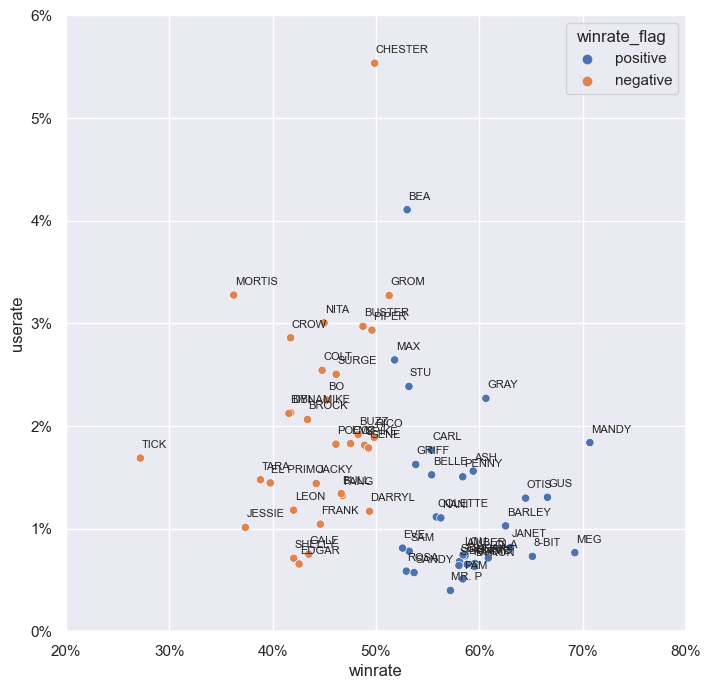

In [227]:
# winrate / userate overall

gamemode = dist_brawler_g()

gamemode['percentile_wr'] = gamemode['winrate'] / gamemode['winrate'].quantile(0.5)
gamemode['winrate_flag'] = np.where(gamemode['percentile_wr'] > 1,'positive','negative')

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(
	data=gamemode
	,x="winrate"
	,y="userate"
	,hue='winrate_flag'
	,ax=ax
)

# Añadir etiquetas flotando sobre los puntos
for i, point in gamemode.iterrows():
	ax.text(point.winrate + 0.001, point.userate + 0.001, point.brawlername, fontsize=8)

yticks = ax.get_yticks()
xticks = ax.get_xticks()

ax.set_yticks(yticks)
ax.set_xticks(xticks)

ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])

plt.show()

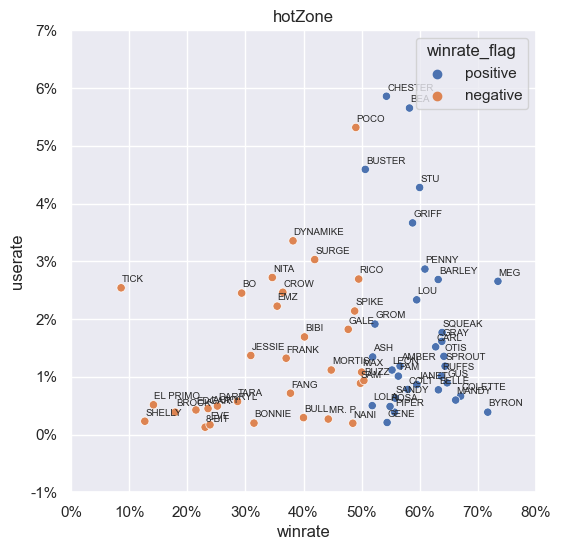

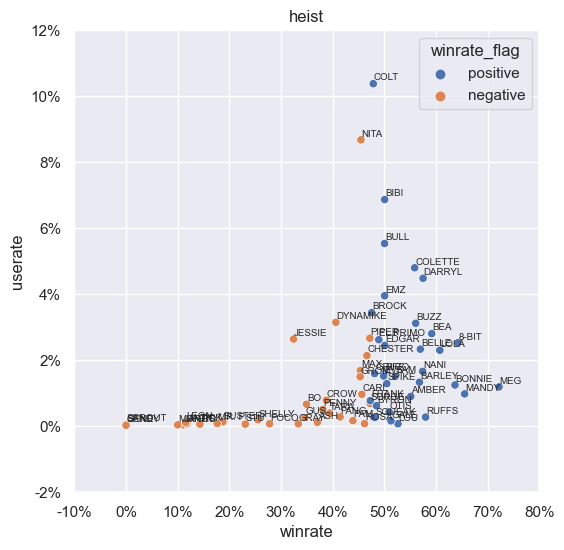

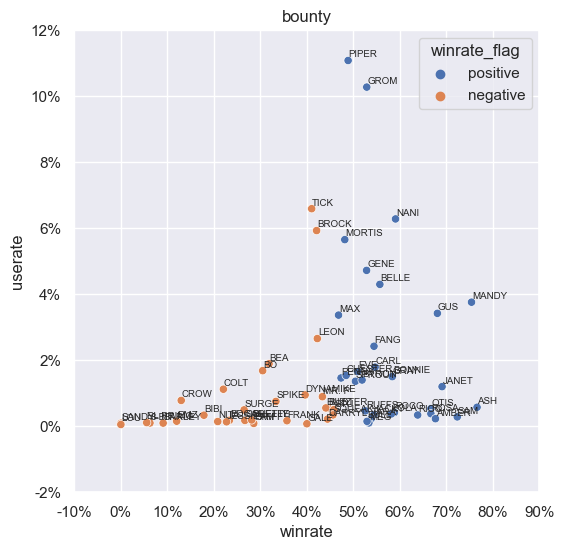

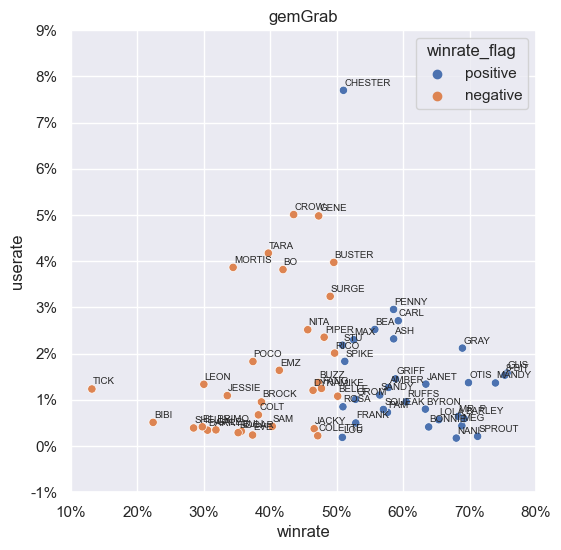

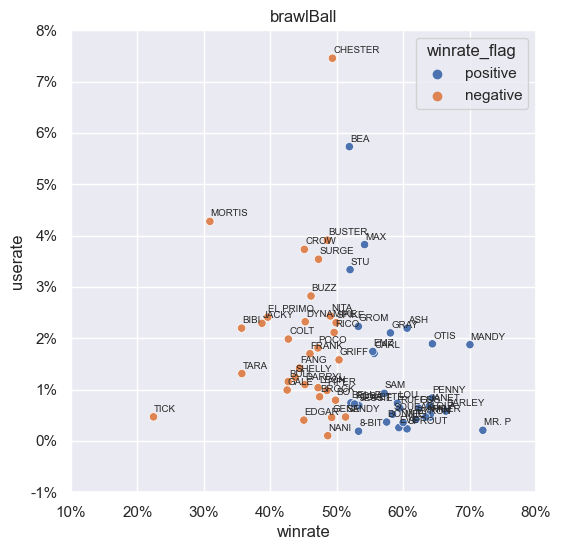

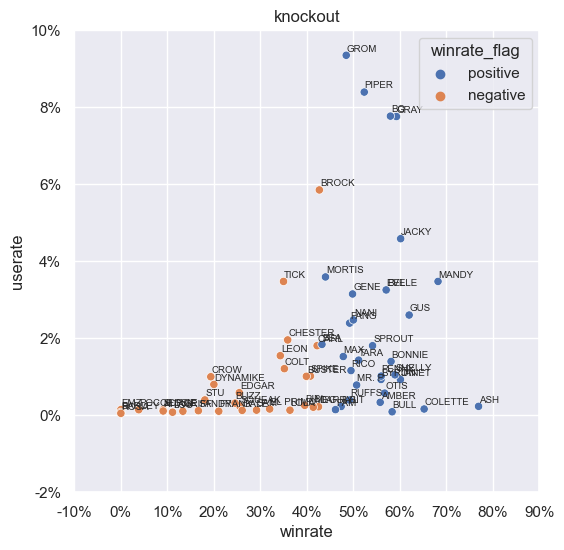

In [228]:
# winrate / userate
gamemodes = ['hotZone','heist','bounty','gemGrab','brawlBall','knockout']

for i, gm in enumerate(gamemodes):
    gamemode = dist_gamemode(gm)

    gamemode['percentile_wr'] = gamemode['winrate'] / gamemode['winrate'].quantile(0.5)
    gamemode['winrate_flag'] = np.where(gamemode['percentile_wr'] > 1,'positive','negative')

    fig, ax = plt.subplots(figsize=(6,6))

    sns.scatterplot(
        data=gamemode
        ,x="winrate"
        ,y="userate"
        ,hue='winrate_flag'
        ,ax=ax
    )

    # Añadir etiquetas flotando sobre los puntos
    for i, point in gamemode.iterrows():
        ax.text(point.winrate + 0.001, point.userate + 0.001, point.brawlername, fontsize=7)

    yticks = ax.get_yticks()
    xticks = ax.get_xticks()

    ax.set_yticks(yticks)
    ax.set_xticks(xticks)

    ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
    ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])
    
    plt.title(gamemode.iloc[0]['event.mode'])

    plt.show()

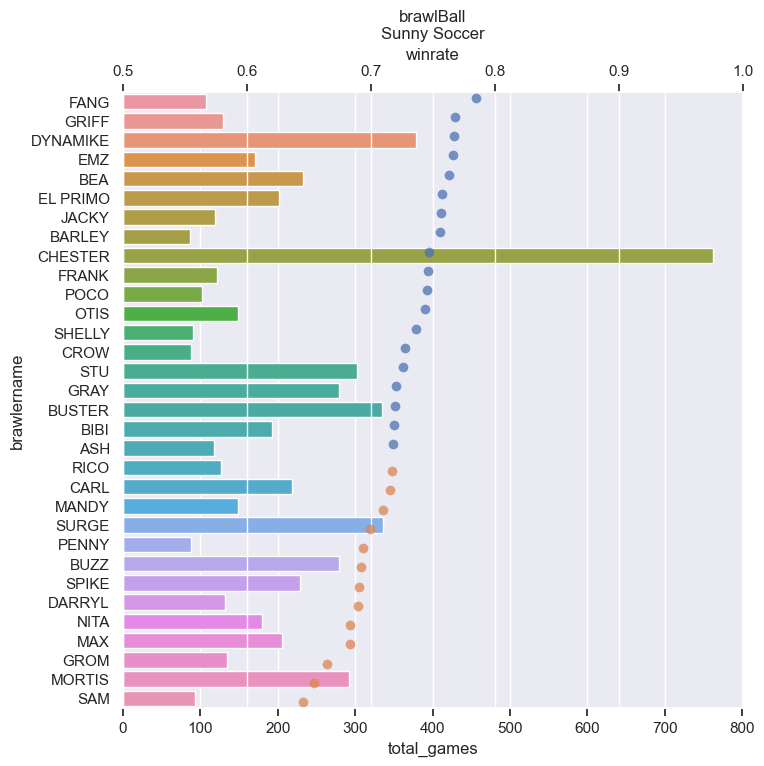

In [ ]:
# gráfico gemgrab en minecraft madness
#REFACTOR
plt.figure(figsize=(8, 8))

gamemode_map = dist_gamemode_map('brawlBall', 'Sunny Soccer')

brawler_winrate = gamemode_map[['brawlername','total_games','total_wins']].groupby('brawlername').agg(sum)
brawler_winrate['winrate'] = brawler_winrate['total_wins'] / brawler_winrate['total_games']
brawler_winrate['percentile'] = brawler_winrate['total_games'] / brawler_winrate['total_games'].quantile(0.5)
brawler_winrate['percentile_wr'] = brawler_winrate['winrate'] / brawler_winrate['winrate'].quantile(0.5)
brawler_winrate['winrate_flag'] = np.where(brawler_winrate['percentile_wr'] > 1,'blue','red')

gamemodemapGraph = gamemode_map.merge(brawler_winrate[brawler_winrate['percentile'] >= 1], on="brawlername", suffixes=['','_brawler']).sort_values(by='winrate_brawler', ascending=False)

ay = plt.axes()

sns.barplot(
    data=gamemodemapGraph,
    x="total_games", y="brawlername"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0.5, 1))

sns.stripplot(
    data=gamemodemapGraph,
    x="winrate", y="brawlername", hue="winrate_flag", dodge=True, alpha=.75, zorder=1, size=7, legend=False
)

plt.title(gamemodemapGraph['event.mode'][0] + '\n' + gamemodemapGraph['event.map'][0])

plt.show()

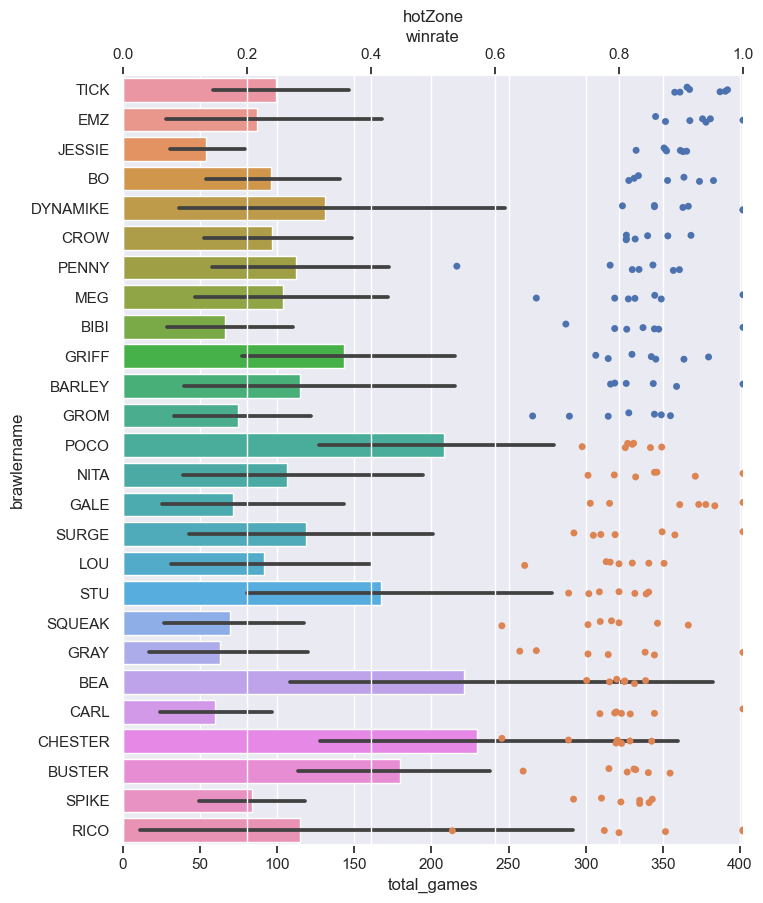

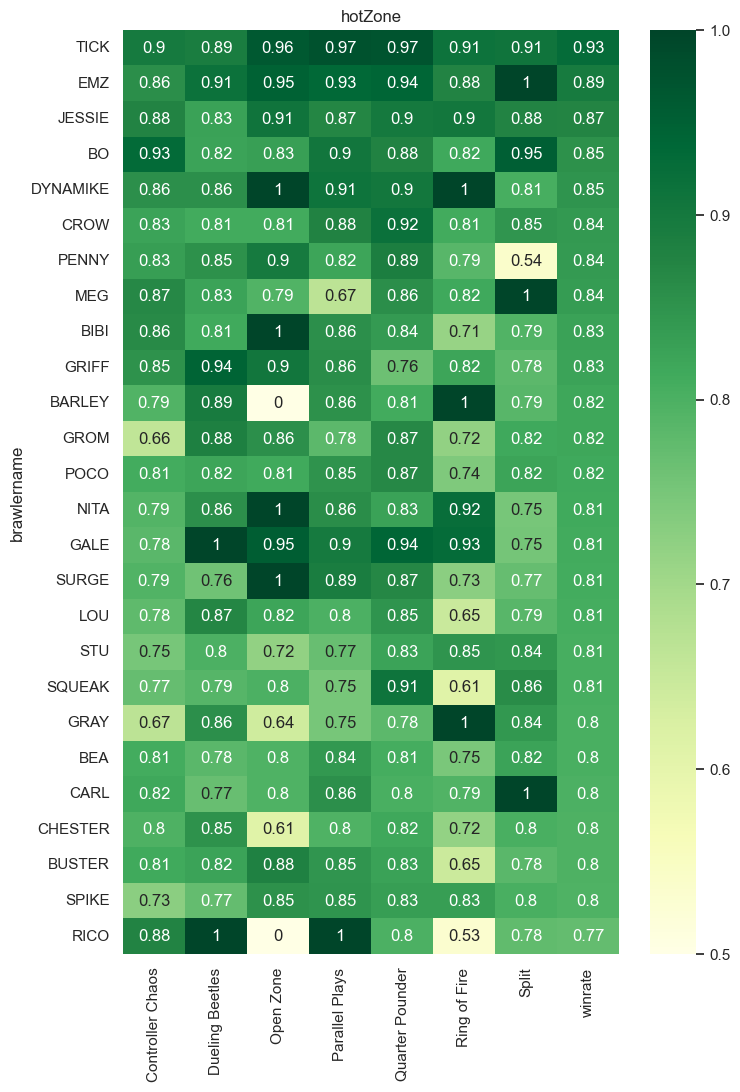

In [ ]:
# gráfico gamemode
#REFACTOR
plt.figure(figsize=(8, 10))

gamemode = dist_gamemode('hotZone')

brawler_winrate = gamemode[['brawlername','total_games','total_wins']].groupby('brawlername').agg(sum)
brawler_winrate['winrate'] = brawler_winrate['total_wins'] / brawler_winrate['total_games']
brawler_winrate['percentile'] = brawler_winrate['total_games'] / brawler_winrate['total_games'].quantile(0.6)
brawler_winrate['percentile_wr'] = brawler_winrate['winrate'] / brawler_winrate['winrate'].quantile(0.5)
brawler_winrate['winrate_flag'] = np.where(brawler_winrate['percentile_wr'] > 1,'blue','red')

#maplist = gamemode['event.map'].drop_duplicates()

gamemodeGraph = gamemode.merge(brawler_winrate[brawler_winrate['percentile'] >= 1], on="brawlername", suffixes=['','_brawler']).sort_values(by='winrate_brawler', ascending=False)

ay = plt.axes()

sns.barplot(
    data=gamemodeGraph
    ,x="total_games"
    ,y="brawlername"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0, 1))

sns.stripplot(
    data=gamemodeGraph,
    x="winrate", y="brawlername", hue="winrate_flag", legend=False
)

plt.title(gamemodeGraph['event.mode'][0])

plt.show()

plt.figure(figsize=(8, 12))

hmGraph = gamemodeGraph.pivot_table(index="brawlername", columns="event.map", values="winrate", fill_value=0).merge(brawler_winrate['winrate'], on="brawlername", how='inner').sort_values(by='winrate', ascending=False)

sns.heatmap(
    data=hmGraph
    ,annot=True
    ,cmap="YlGn"
    ,vmin=0.5
)

plt.title(gamemodeGraph['event.mode'][0])

plt.show()

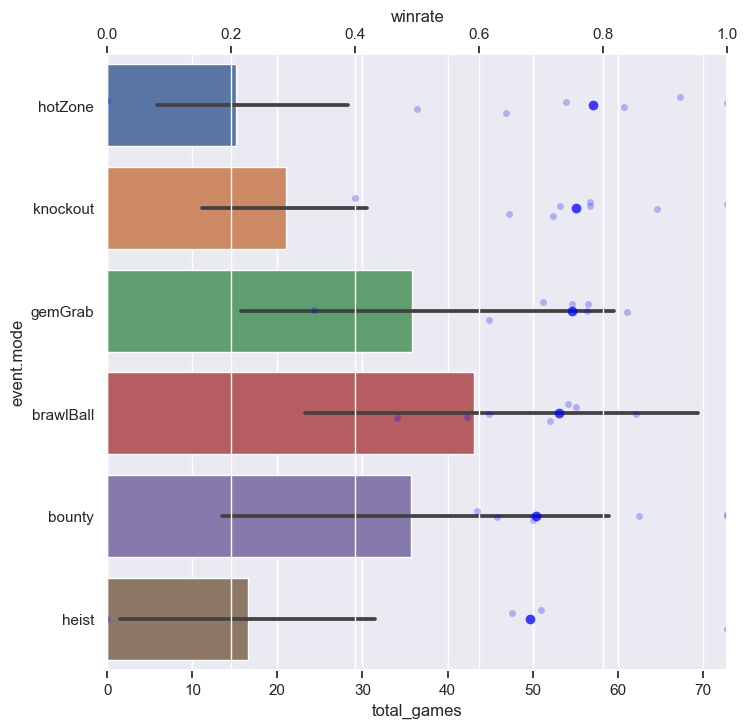

In [ ]:
# gráfico brawler
#REFACTOR
plt.figure(figsize=(8, 8))

brawler = dist_brawler('BYRON')

gamemode_winrate = brawler[['event.mode','total_games','total_wins']].groupby('event.mode').agg(sum)
gamemode_winrate['winrate'] = gamemode_winrate['total_wins'] / gamemode_winrate['total_games']

#maplist = brawler['event.map'].drop_duplicates()

brawlerGraph = brawler.merge(gamemode_winrate, on="event.mode", suffixes=['','_gamemode']).sort_values(by='winrate_gamemode', ascending=False)

#colorlist = sns.color_palette("Set2")

ay = plt.axes()

sns.barplot(
    data=brawlerGraph,
    x="total_games", y="event.mode"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0, 1))

sns.stripplot(
    data=brawlerGraph,
    x="winrate", y="event.mode", color='blue', dodge=True, alpha=.25, zorder=1
)

sns.stripplot(
    data=gamemode_winrate,
    x="winrate", y="event.mode", color='blue', alpha=.75, zorder=1, size=7
)

plt.show()